In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()

In [3]:
x_collumns=bc.feature_names

In [4]:
X=pd.DataFrame(bc.data,index=None,columns=x_collumns)

In [5]:
Y=pd.DataFrame(bc.target,index=None,columns=['MALIGNANT/BENIGN'])

CKECKING THE PERCENTAGE FOR LINEAR REGRESSION FIRST

In [6]:
from sklearn.model_selection import train_test_split
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X,Y,test_size=0.30)

In [7]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

In [8]:
log_model.fit(X_TRAIN,Y_TRAIN)

C:\Users\aswprabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aswprabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
log_model_predicted=log_model.predict(X_TEST)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix

In [11]:
print(confusion_matrix(Y_TEST,log_model_predicted))
print(classification_report(Y_TEST,log_model_predicted))

[[ 54   3]
 [  6 108]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        57
           1       0.97      0.95      0.96       114

   micro avg       0.95      0.95      0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



Now Scalling the feeatures using the Standard Scalling UFunction and then predicting the same using KNN Classifier with neighbors as 1

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
scaled_features = scaler.transform(X)

In [15]:
df_scaled = pd.DataFrame(scaled_features,index=None,columns=x_collumns)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(df_scaled,Y,test_size=0.30)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
knn_predictions_1= knn.predict(x_test)
print(confusion_matrix(y_test,knn_predictions_1))
print(classification_report(y_test,knn_predictions_1))

[[ 55   4]
 [  3 109]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        59
           1       0.96      0.97      0.97       112

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171



C:\Users\aswprabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
error_rate=[]
for i in range(1,41):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train)
    KNN_PREDICTIONS_= KNN.predict(x_test)
    error_rate.append(np.mean(KNN_PREDICTIONS_!=np.array(y_test)))

C:\Users\aswprabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\aswprabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\aswprabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\aswprabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

C:\Users\aswprabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Text(0, 0.5, 'ERROR RATE')

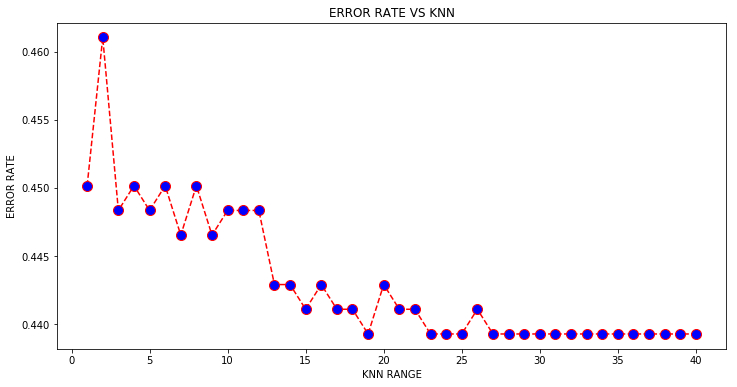

In [19]:
plt.figure(figsize=(12,6))
plt.plot(range(1,41),error_rate,color='red',linestyle='--',marker='o',markersize=10,markerfacecolor='blue')
plt.title("ERROR RATE VS KNN")
plt.xlabel("KNN RANGE")
plt.ylabel("ERROR RATE")

In [30]:
KN=KNeighborsClassifier(n_neighbors=6)
KN.fit(x_train,y_train)
pred=KN.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 57   2]
 [  1 111]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        59
           1       0.98      0.99      0.99       112

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



C:\Users\aswprabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
